In [1]:
install.packages("caret")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘abind’, ‘bindr’, ‘lava’, ‘kernlab’, ‘CVST’, ‘DEoptimR’, ‘magic’, ‘assertthat’, ‘bindrcpp’, ‘BH’, ‘plogr’, ‘backports’, ‘prodlim’, ‘DRR’, ‘robustbase’, ‘sfsmisc’, ‘geometry’, ‘iterators’, ‘data.table’, ‘dplyr’, ‘broom’, ‘ipred’, ‘dimRed’, ‘lubridate’, ‘timeDate’, ‘ddalpha’, ‘gower’, ‘RcppRoll’, ‘tidyselect’, ‘tidyr’, ‘pls’, ‘foreach’, ‘ModelMetrics’, ‘recipes’




In [2]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'dplyr':
  method               from  
  as.data.frame.tbl_df tibble

Warning message:
“As of rlang 0.4.0, dplyr must be at least version 0.8.0.
* dplyr 0.7.7 is too old for rlang 0.4.12.
* Please update dplyr with `install.packages("dplyr")` and restart R.”


In [3]:
data(iris)
dataset <- iris

In [4]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
validation <- dataset[-validation_index,]
dataset <- dataset[validation_index,]

In [5]:
dim(dataset)

[1] 120   5

In [6]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [7]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa


In [8]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [9]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [10]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.855   Mean   :3.076   Mean   :3.759   Mean   :1.201  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

In [11]:
x <- dataset[,1:4]
y <- dataset[,5]

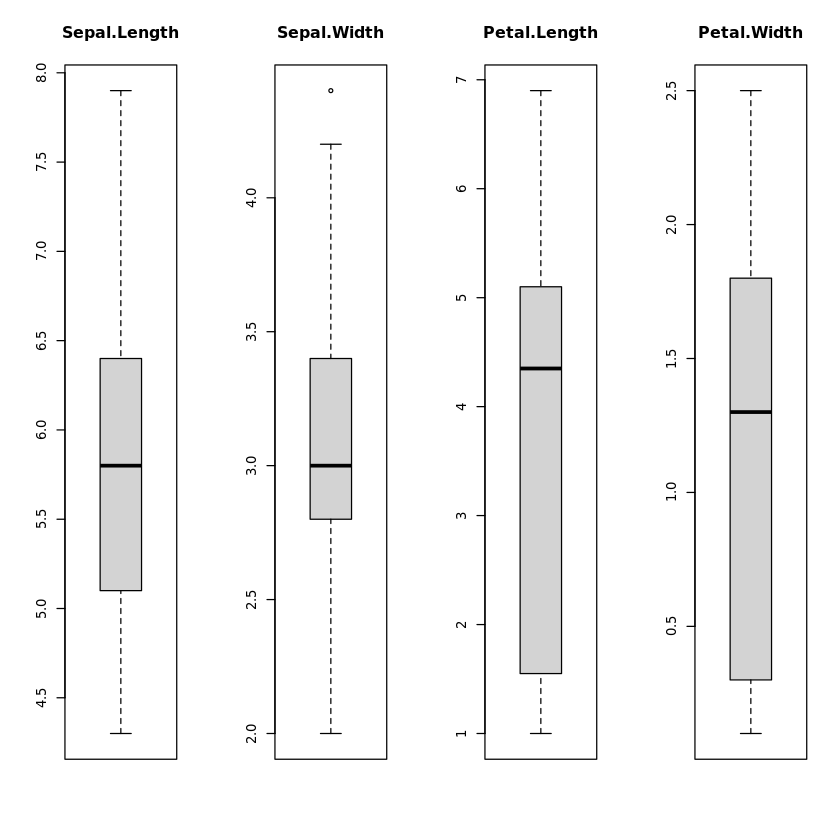

In [12]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

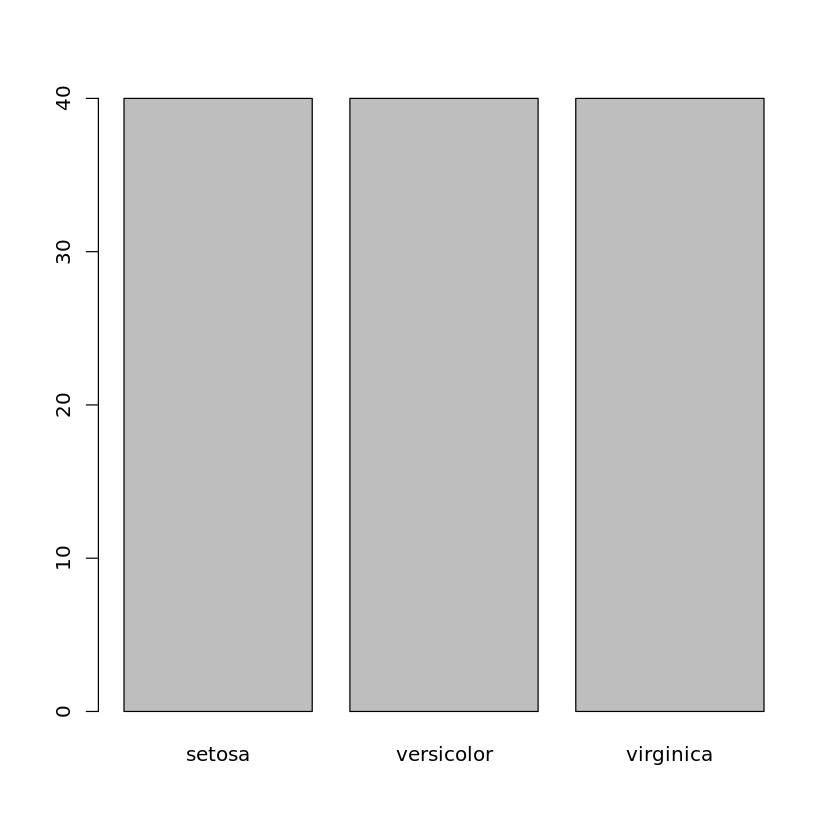

In [13]:
plot(y)

ERROR while rich displaying an object: Error in grid.Call.graphics(C_downviewport, name$name, strict): Viewport 'plot_01.panel.1.1.off.vp' was not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr

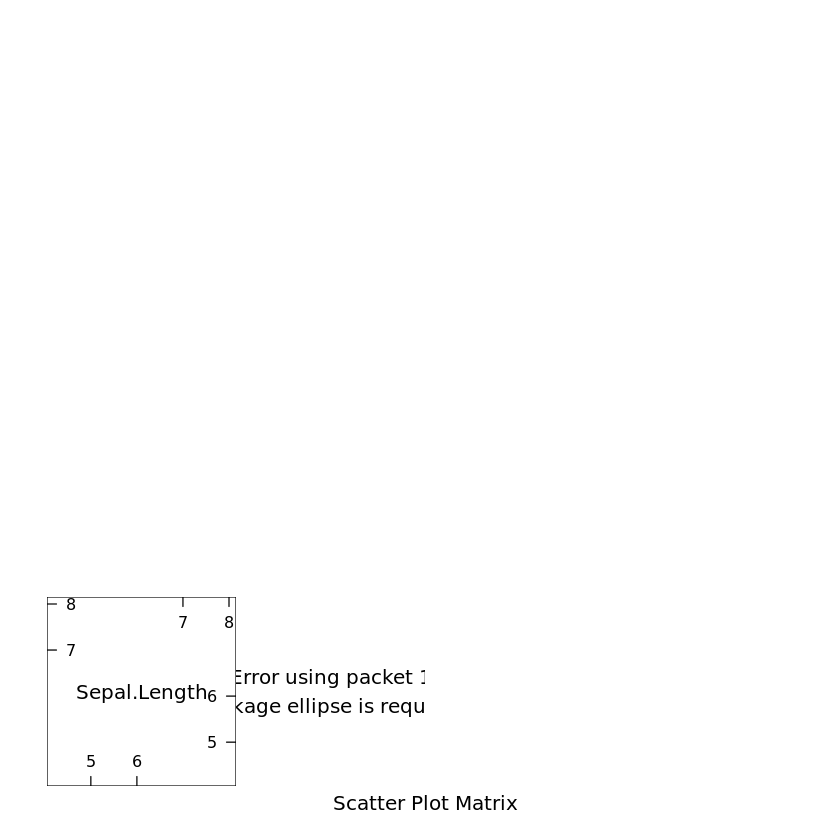

In [14]:
featurePlot(x=x, y=y, plot="ellipse")

In [15]:
install.packages("ellipse")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



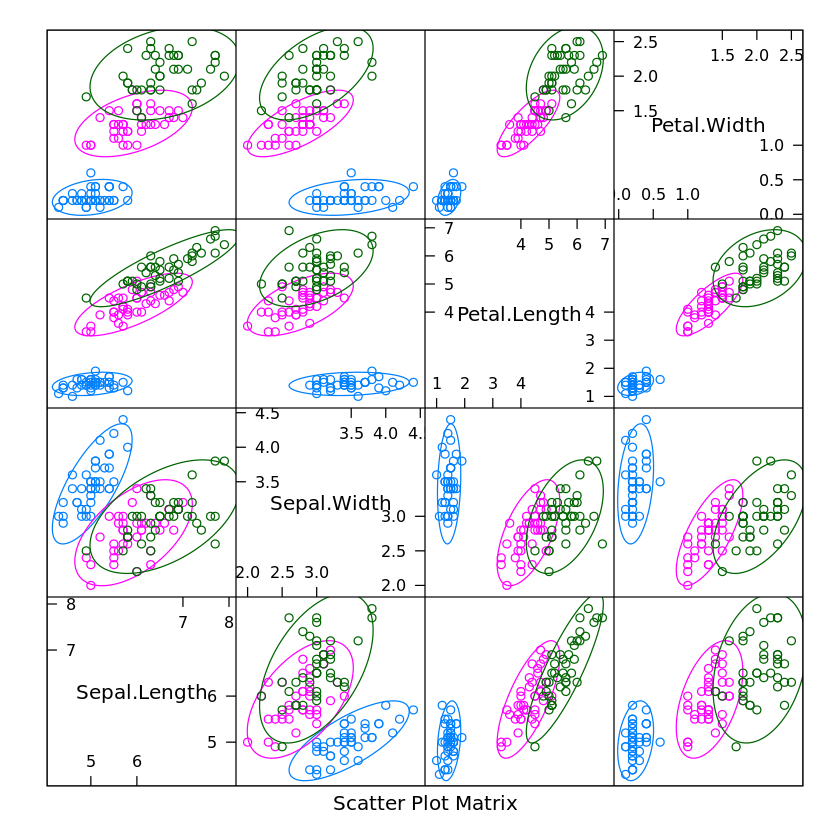

In [16]:
featurePlot(x=x, y=y, plot="ellipse")

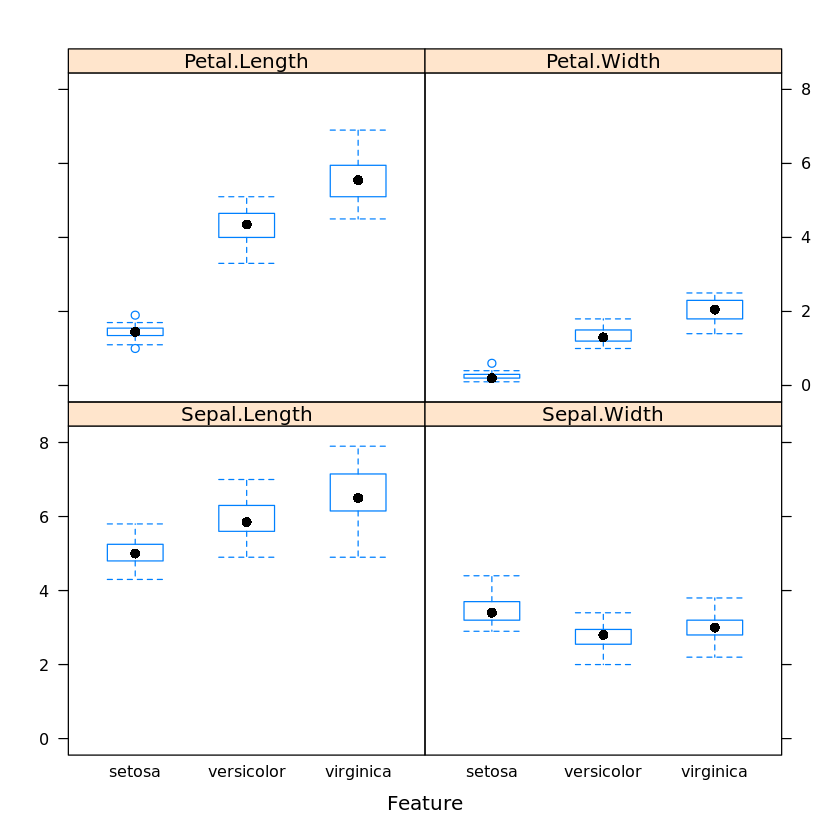

In [17]:
featurePlot(x=x, y=y, plot="box")

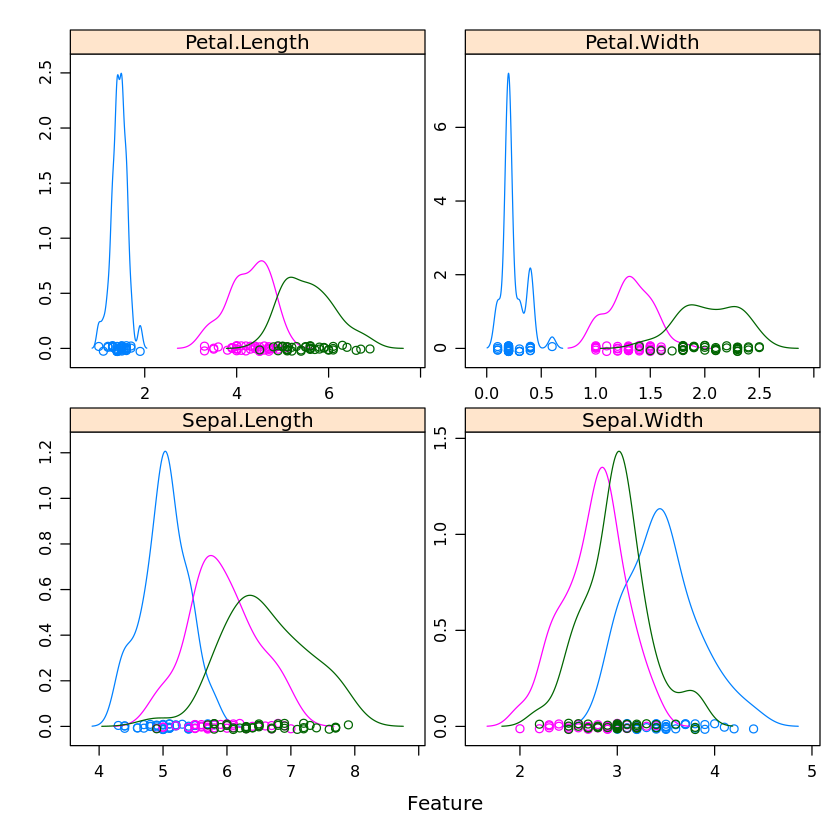

In [18]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [19]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [22]:
install.packages('e1071', dependencies=TRUE)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mlbench’, ‘randomForest’, ‘SparseM’




In [23]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [24]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 0.9375000 1.0000000 0.9750000 1.0000000    1    0
cart 0.8333333 0.9166667 0.9166667 0.9250000 0.9791667    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
svm  0.9166667 0.9166667 0.9583333 0.9583333 1.0000000    1    0
rf   0.7500000 0.9166667 0.9583333 0.9416667 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 0.90625 1.0000 0.9625 1.00000    1    0
cart 0.750 0.87500 0.8750 0.8875 0.96875    1    0
knn  0.875 1.00000 1.0000 0.9750 1.00000    1    0
svm  0.875 0.87500 0.9375 0.9375 1.00000    1    0
rf   0.625 0.87500 0.9375 0.9125 1.00000    1    0


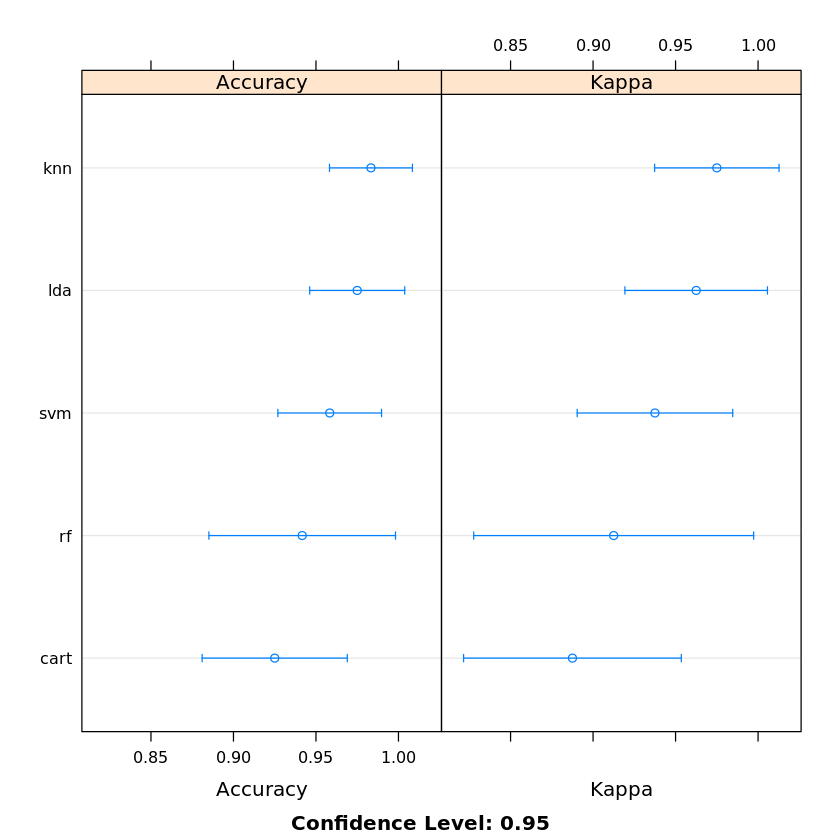

In [25]:
dotplot(results)

In [26]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



In [27]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         1
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9000
Specificity                 1.0000            0.9500           1.0000
Pos Pred Value              1.0000            0.9091           1.0000
Neg Pred Value              1.0000            1.0000           0.9524
Prevalence                  0.3333          